Treinar modelo era

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Input

In [2]:
df = pd.read_csv('oceanographic and meteorological dataset.csv')
df.head(5)
df

,time,u10_era5,v10_era5,mwd_era5,mwp_era5,swh_era5,pp1d_era5,uo_cop,vo_cop,swh_cop,mwp_cop,mwd_cop,peak_period_cop
0,2025-01-01 00:00:00,-6.306534,14.981308,172.33765,8.959626,4.751488,10.330421,0.019531,0.160156,5.10,7.56,175.07,10.85
1,2025-01-01 01:00:00,-4.723419,14.342773,171.36377,8.907424,4.758851,10.286964,0.026367,0.164062,NaN,NaN,NaN,NaN
2,2025-01-01 02:00:00,-3.978439,12.770416,171.11426,8.913869,4.665862,10.272316,0.038086,0.162109,NaN,NaN,NaN,NaN
3,2025-01-01 03:00:00,-3.164124,15.130005,171.06311,8.911307,4.565788,10.260597,0.053711,0.155273,5.03,7.60,174.16,10.71
4,2025-01-01 04:00:00,-3.343689,12.074799,171.16702,8.862277,4.541395,10.223000,0.070312,0.143555,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7988,2025-11-29 20:00:00,1.050568,-3.002213,321.76660,9.391575,1.740068,11.188332,-0.073242,-0.041992,NaN,NaN,NaN,NaN
7989,2025-11-29 21:00:00,0.547165,-2.844864,321.52417,9.404360,1.737550,11.162453,-0.093750,-0.019531,NaN,NaN,NaN,NaN
7990,2025-11-29 22:00:00,0.728592,-1.884628,321.26782,9.426389,1.733764,11.128273,-0.110352,0.005859,NaN,NaN,NaN,NaN
7991,2025-11-29 23:00:00,1.034180,-1.534332,321.06323,9.438893,1.730834,11.099464,-0.120117,0.032227,NaN,NaN,NaN,NaN


Treinar modelo para variavel mwd

In [3]:
colunas_para_remover = [
    'uo_cop', 'vo_cop', 'swh_cop', 'mwd_cop', 
    'mwp_cop', 'peak_period_cop', 'time',
]
df = df.drop(columns=colunas_para_remover, errors='ignore')
df.describe()

,u10_era5,v10_era5,mwd_era5,mwp_era5,swh_era5,pp1d_era5
count,7993.000000,7993.000000,7993.000000,7993.000000,7993.000000,7993.000000
mean,2.188604,-0.618673,254.533087,8.491293,2.289455,10.429202
std,5.049941,5.654880,101.285307,1.508553,1.293055,2.219554
min,-10.217163,-17.162354,0.005922,5.044391,0.706308,4.360695
25%,-1.410156,-4.420624,247.110920,7.368544,1.306941,8.810890
50%,2.046631,-1.186233,291.861820,8.303400,1.870715,10.276711
75%,5.630310,3.352921,320.586180,9.305229,2.910931,11.903175
max,21.640991,17.548920,359.915250,14.556703,8.823090,19.234710


Alterar variavel mwd para sin e cos

In [4]:
def add_direction_features(df, col):
    df[f'{col}_sin'] = np.sin(np.deg2rad(df[col]))
    df[f'{col}_cos'] = np.cos(np.deg2rad(df[col]))
    return df

In [5]:
df = add_direction_features(df, 'mwd_era5')

In [6]:
df.describe()

,u10_era5,v10_era5,mwd_era5,mwp_era5,swh_era5,pp1d_era5,mwd_era5_sin,mwd_era5_cos
count,7993.000000,7993.000000,7993.000000,7993.000000,7993.000000,7993.000000,7993.000000,7993.000000
mean,2.188604,-0.618673,254.533087,8.491293,2.289455,10.429202,-0.482059,0.436709
std,5.049941,5.654880,101.285307,1.508553,1.293055,2.219554,0.585773,0.483577
min,-10.217163,-17.162354,0.005922,5.044391,0.706308,4.360695,-1.000000,-0.999988
25%,-1.410156,-4.420624,247.110920,7.368544,1.306941,8.810890,-0.926656,0.149474
50%,2.046631,-1.186233,291.861820,8.303400,1.870715,10.276711,-0.712566,0.533409
75%,5.630310,3.352921,320.586180,9.305229,2.910931,11.903175,-0.268729,0.849137
max,21.640991,17.548920,359.915250,14.556703,8.823090,19.234710,1.000000,1.000000


Criar Modelo

In [7]:
def create_supervised_dataset(df, features, target, lookback, horizon):
    X, y = [], []

    data = df[features + [target]].values

    for i in range(lookback, len(df) - horizon):
        X.append(data[i - lookback:i, :-1])
        y.append(data[i + horizon, -1])

    return np.array(X), np.array(y)

In [8]:
def temporal_train_val_test_split(X, y, train=0.7, val=0.1):
    n = len(X)
    n_train = int(n * train)
    n_val = int(n * (train + val))

    X_train = X[:n_train]
    y_train = y[:n_train]

    X_val = X[n_train:n_val]
    y_val = y[n_train:n_val]

    X_test = X[n_val:]
    y_test = y[n_val:]

    return X_train, X_val, X_test, y_train, y_val, y_test

In [9]:
def scale_data(X_train, X_test):
    n_samples, timesteps, n_features = X_train.shape

    scaler = StandardScaler()
    X_train_2d = X_train.reshape(-1, n_features)
    X_test_2d  = X_test.reshape(-1, n_features)

    X_train_scaled = scaler.fit_transform(X_train_2d)
    X_test_scaled  = scaler.transform(X_test_2d)

    X_train_scaled = X_train_scaled.reshape(n_samples, timesteps, n_features)
    X_test_scaled  = X_test_scaled.reshape(X_test.shape[0], timesteps, n_features)

    return X_train_scaled, X_test_scaled, scaler

In [10]:
def build_cnn_model(input_shape):
    model = Sequential([
        # Forma moderna de definir a entrada
        Input(shape=input_shape), 
        
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),

        
        Flatten(),
        Dense(50, activation='relu'),
        Dropout(0.2),
        Dense(1)
    ])
    
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

In [11]:
HORIZONS = [1, 3, 6, 12, 24]
LOOKBACK = 24

TARGETS = ['swh_era5', 'mwp_era5', 'pp1d_era5']
FEATURES_ERA5 = [
    'u10_era5',
    'v10_era5',
    'swh_era5',
    'mwd_era5_sin',
    'mwd_era5_cos',
    'mwp_era5',
    'pp1d_era5'
]
 
results = []

for target in TARGETS:
    for h in HORIZONS:

        print(f'\nTreinar target={target} | horizonte={h}h')

        # criar dataset
        X, y = create_supervised_dataset(
            df,
            FEATURES_ERA5,
            target,
            LOOKBACK,
            h
        )

        X_train, X_val, X_test, y_train, y_val, y_test = temporal_train_val_test_split(X, y)
        X_train, X_test, scaler = scale_data(X_train, X_test)

        model = build_cnn_model(X_train.shape[1:])

        history = model.fit(
            X_train, y_train,
            validation_data=(X_val,y_val),
            epochs=20,
            batch_size=32,
            verbose=2,
            
        )

        y_pred = model.predict(X_test).ravel()

        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae  = mean_absolute_error(y_test, y_pred)
        r2   = r2_score(y_test, y_pred)

        print(f'RMSE = {rmse:.3f} | MAE = {mae:.3f} | R2 = {r2:.3f}')

        results.append({
            'target': target,
            'horizon': h,
            'rmse': rmse,
            'mae': mae,
            'r2': r2
        })  


Treinar target=swh_era5 | horizonte=1h
Epoch 1/20
175/175 - 4s - 22ms/step - loss: 0.6368 - mae: 0.5116 - val_loss: 116.7100 - val_mae: 10.6920
Epoch 2/20
175/175 - 1s - 6ms/step - loss: 0.2311 - mae: 0.3310 - val_loss: 71.6259 - val_mae: 8.2801
Epoch 3/20
175/175 - 1s - 7ms/step - loss: 0.1827 - mae: 0.2912 - val_loss: 75.2379 - val_mae: 8.4791
Epoch 4/20
175/175 - 1s - 7ms/step - loss: 0.1622 - mae: 0.2787 - val_loss: 73.6697 - val_mae: 8.4047
Epoch 5/20
175/175 - 1s - 5ms/step - loss: 0.1512 - mae: 0.2672 - val_loss: 59.6598 - val_mae: 7.5213
Epoch 6/20
175/175 - 1s - 7ms/step - loss: 0.1370 - mae: 0.2521 - val_loss: 75.3577 - val_mae: 8.5143
Epoch 7/20
175/175 - 1s - 8ms/step - loss: 0.1231 - mae: 0.2439 - val_loss: 72.0076 - val_mae: 8.3228
Epoch 8/20
175/175 - 2s - 10ms/step - loss: 0.1240 - mae: 0.2377 - val_loss: 72.7385 - val_mae: 8.3489
Epoch 9/20
175/175 - 2s - 9ms/step - loss: 0.1165 - mae: 0.2330 - val_loss: 48.8455 - val_mae: 6.8441
Epoch 10/20
175/175 - 1s - 8ms/step - 

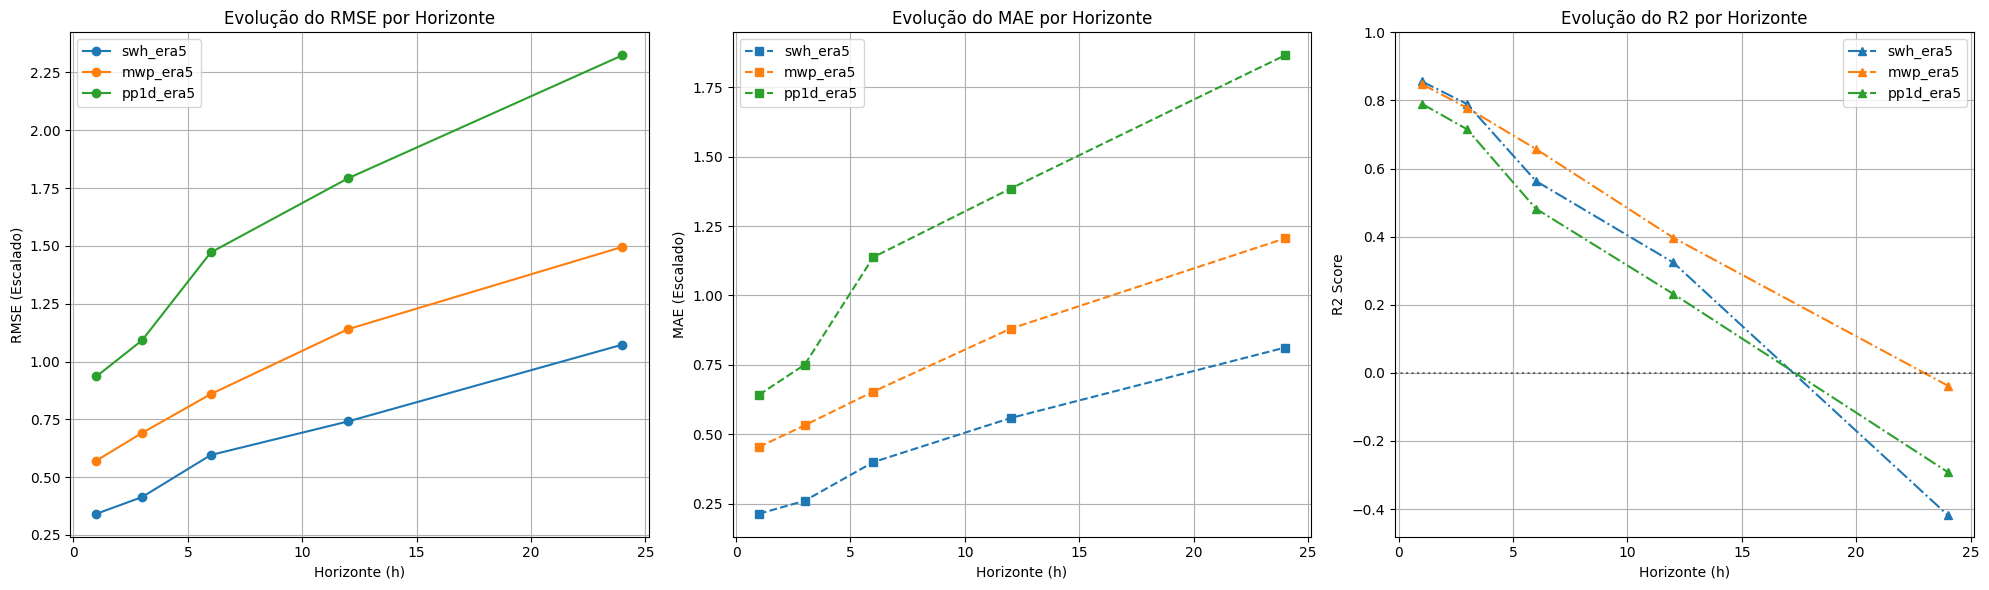

In [12]:
results_df = pd.DataFrame(results)

# 1. Alterado para 1 linha e 3 colunas para incluir o R2
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

for target in TARGETS:
    subset = results_df[results_df['target'] == target]
    
    # Gráfico 1: RMSE
    ax1.plot(subset['horizon'], subset['rmse'], marker='o', label=target)
    
    # Gráfico 2: MAE
    ax2.plot(subset['horizon'], subset['mae'], marker='s', linestyle='--', label=target)
    
    # Gráfico 3: R2 (Novo)
    ax3.plot(subset['horizon'], subset['r2'], marker='^', linestyle='-.', label=target)

# Ajustes do gráfico de RMSE
ax1.set_title('Evolução do RMSE por Horizonte')
ax1.set_xlabel('Horizonte (h)')
ax1.set_ylabel('RMSE (Escalado)')
ax1.legend()
ax1.grid(True)

# Ajustes do gráfico de MAE
ax2.set_title('Evolução do MAE por Horizonte')
ax2.set_xlabel('Horizonte (h)')
ax2.set_ylabel('MAE (Escalado)')
ax2.legend()
ax2.grid(True)

# Ajustes do gráfico de R2
ax3.set_title('Evolução do R2 por Horizonte')
ax3.set_xlabel('Horizonte (h)')
ax3.set_ylabel('R2 Score')
# Adiciona uma linha horizontal no 0 para identificar onde o modelo falha
ax3.axhline(0, color='black', linestyle=':', alpha=0.5) 
ax3.set_ylim(None, 1.0) # O R2 não passa de 1.0
ax3.legend()
ax3.grid(True)

plt.tight_layout()
plt.show()

ERA5 sem variaveis de vento

In [13]:
HORIZONS = [1, 3, 6, 12, 24]
LOOKBACK = 24

TARGETS = ['swh_era5', 'mwp_era5', 'pp1d_era5']
FEATURES = [
    'swh_era5',
    'mwd_era5_sin',
    'mwd_era5_cos',
    'mwp_era5',
    'pp1d_era5'
]

  
results = []

for target in TARGETS:
    for h in HORIZONS:

        print(f'\nTreinar target={target} | horizonte={h}h')

        # criar dataset
        X, y = create_supervised_dataset(
            df,
            FEATURES,
            target,
            LOOKBACK,
            h
        )

        X_train, X_val, X_test, y_train, y_val, y_test = temporal_train_val_test_split(X, y)

        X_train, X_test, scaler = scale_data(X_train, X_test)

        model = build_cnn_model(X_train.shape[1:])

        history = model.fit(
            X_train, y_train,
            validation_data=(X_val,y_val),
            epochs=20,
            batch_size=32,
            verbose=2
        )

        y_pred = model.predict(X_test).ravel()

        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae  = mean_absolute_error(y_test, y_pred)
        r2   = r2_score(y_test, y_pred)

        print(f'RMSE = {rmse:.3f} | MAE = {mae:.3f} | R2 = {r2:.3f}')

        results.append({
            'target': target,
            'horizon': h,
            'rmse': rmse,
            'mae': mae,
            'r2': r2
        })



Treinar target=swh_era5 | horizonte=1h
Epoch 1/20
175/175 - 3s - 18ms/step - loss: 0.7802 - mae: 0.5716 - val_loss: 103.1978 - val_mae: 9.9990
Epoch 2/20
175/175 - 1s - 8ms/step - loss: 0.2262 - mae: 0.3225 - val_loss: 54.2309 - val_mae: 7.2562
Epoch 3/20
175/175 - 1s - 8ms/step - loss: 0.1985 - mae: 0.3034 - val_loss: 55.7214 - val_mae: 7.3589
Epoch 4/20
175/175 - 1s - 9ms/step - loss: 0.1671 - mae: 0.2791 - val_loss: 38.6318 - val_mae: 6.1324
Epoch 5/20
175/175 - 1s - 8ms/step - loss: 0.1597 - mae: 0.2736 - val_loss: 51.7219 - val_mae: 7.0978
Epoch 6/20
175/175 - 2s - 9ms/step - loss: 0.1413 - mae: 0.2587 - val_loss: 34.7895 - val_mae: 5.8227
Epoch 7/20
175/175 - 2s - 9ms/step - loss: 0.1372 - mae: 0.2529 - val_loss: 35.0341 - val_mae: 5.8475
Epoch 8/20
175/175 - 2s - 9ms/step - loss: 0.1462 - mae: 0.2561 - val_loss: 23.2747 - val_mae: 4.7639
Epoch 9/20
175/175 - 1s - 7ms/step - loss: 0.1385 - mae: 0.2505 - val_loss: 41.5246 - val_mae: 6.3688
Epoch 10/20
175/175 - 1s - 6ms/step - lo

In [14]:
results_df['Versão'] = 'Completo'
results_df_vento = pd.DataFrame(results)
results_df_vento['Versão'] = 'Sem Vento'

# 2. Concatenar os dois DataFrames
df_final = pd.concat([results_df, results_df_vento])

# 3. Criar a Pivot Table com Multi-Index nas colunas
# O index será o horizonte, e as colunas serão divididas por Target e depois por Versão
pivot_comparativa = df_final.pivot_table(
    index='horizon', 
    columns=['target', 'Versão'], 
    values='rmse'
)

print("\n--- COMPARAÇÃO DE RESULTADOS (RMSE): COM VS SEM VARIÁVEIS EXÓGENAS ---")
display(pivot_comparativa.round(4))

# --- CORREÇÃO PARA O MAE ---
print("\n--- COMPARAÇÃO DE RESULTADOS (MAE): COM VS SEM VARIÁVEIS EXÓGENAS ---")

# Usamos o df_final (que contém 'Completo' e 'Sem Vento/Corr.')
pivot_mae_comparativa = df_final.pivot_table(
    index='horizon', 
    columns=['target', 'Versão'], 
    values='mae'
)

display(pivot_mae_comparativa.round(4))


--- COMPARAÇÃO DE RESULTADOS (RMSE): COM VS SEM VARIÁVEIS EXÓGENAS ---


target  mwp_era5           pp1d_era5           swh_era5          
Versão  Completo Sem Vento  Completo Sem Vento Completo Sem Vento
horizon                                                          
1         0.5715    0.4703    0.9353    1.2312   0.3416    0.3591
3         0.6913    0.6476    1.0917    1.1380   0.4139    0.4554
6         0.8589    0.8605    1.4714    1.5467   0.5956    0.5817
12        1.1397    1.1561    1.7920    1.6884   0.7409    0.8183
24        1.4957    1.7054    2.3242    2.0948   1.0731    1.1560


--- COMPARAÇÃO DE RESULTADOS (MAE): COM VS SEM VARIÁVEIS EXÓGENAS ---


target  mwp_era5           pp1d_era5           swh_era5          
Versão  Completo Sem Vento  Completo Sem Vento Completo Sem Vento
horizon                                                          
1         0.4546    0.3531    0.6422    1.0298   0.2141    0.2119
3         0.5327    0.4959    0.7510    0.8170   0.2610    0.2799
6         0.6540    0.6974    1.1381    1.2461   0.4000    0.3980
12        0.8804    0.9149    1.3847    1.2781   0.5588    0.5572
24        1.2056    1.4248    1.8648    1.7587   0.8126    0.8555

CNN para variavel sen e cos

In [15]:
def build_cnn_model(input_shape, output_units=1): # Adiciona este parâmetro
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv1D(32, kernel_size=3, activation='relu'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(output_units)) # <--- Usa a variável aqui em vez de fixar em 1 ou 2
    model.compile(optimizer='adam', loss='mse')
    return model

In [16]:
def angular_error_deg(true, pred):
    """Diferença angular mínima em graus"""
    delta = np.arctan2(np.sin(np.deg2rad(pred - true)),
                       np.cos(np.deg2rad(pred - true)))
    return np.rad2deg(delta)

In [17]:
def create_supervised_dataset(df, features, target, lookback, horizon):
    # Garante que target é uma lista para a concatenação funcionar
    if isinstance(target, str):
        target = [target]
        
    X, y = [], []
    # Agora features + target será sempre [lista] + [lista]
    data = df[features + target].values  
    
    n_features = len(features)
    n_targets = len(target)

    for i in range(len(data) - lookback - horizon + 1):
        X.append(data[i:i + lookback, :n_features])
        # Seleciona todas as colunas de target
        y.append(data[i + lookback + horizon - 1, n_features:])
        
    return np.array(X), np.array(y)
    
   

In [18]:
def circular_metrics(y_true, y_pred):
    # 1. Calcular a diferença absoluta (0-360)
    diff = np.abs(y_true - y_pred) % 360
    
    # 2. Ajustar para o caminho mais curto (se diff > 180, o erro real é 360 - diff)
    # Exemplo: Real 1°, Previsto 359° -> diff = 358. Ajustado = 360 - 358 = 2°
    shortest_diff = np.where(diff > 180, 360 - diff, diff)
    
    # 3. Calcular métricas baseadas na diferença corrigida
    rmse_circ = np.sqrt(np.mean(shortest_diff**2))
    mae_circ = np.mean(shortest_diff)
    
    return rmse_circ, mae_circ

In [19]:
TARGETS = [['mwd_era5_sin', 'mwd_era5_cos']] # Note os dois parênteses [[ ]]
HORIZONS = [1, 3, 6, 12, 24]
FEATURES_ERA5 = [

    'u10_era5',

    'v10_era5',

    'swh_era5',

    'mwd_era5_sin',

    'mwd_era5_cos',

    'mwp_era5',

    'pp1d_era5'

]


results = []

for target in TARGETS:
    for h in HORIZONS:
        print(f'\nTreinar target={target} | horizonte={h}h')

        # 1. Criar dataset (A função que corrigimos antes aceita listas)
        X, y = create_supervised_dataset(df, FEATURES_ERA5, target, LOOKBACK, h)

        X_train, X_val, X_test, y_train, y_val, y_test = temporal_train_val_test_split(X, y)
        X_train, X_test, scaler = scale_data(X_train, X_test)

        # n_outputs será 2 porque len(['sin', 'cos']) == 2
        n_outputs = y.shape[1] if len(y.shape) > 1 else 1
        
        model = build_cnn_model(X_train.shape[1:], output_units=n_outputs)

        # 2. Treinar
        model.fit(X_train, y_train, validation_data=(X_val, y_val), 
                  epochs=20, batch_size=32, verbose=0)

        # 3. Previsão
        y_pred = model.predict(X_test)

        # --- AVALIAÇÃO ---
        if n_outputs == 2:
            y_test_deg = np.degrees(np.arctan2(y_test[:, 0], y_test[:, 1])) % 360
            y_pred_deg = np.degrees(np.arctan2(y_pred[:, 0], y_pred[:, 1])) % 360
            rmse, mae = circular_metrics(y_test_deg, y_pred_deg)
            r2 = r2_score(y_test_deg, y_pred_deg)
            target_name = 'mwd_era5' # Nome simplificado para a tabela final
        else:
            y_pred = y_pred.ravel() 
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            mae  = mean_absolute_error(y_test, y_pred)
            r2   = r2_score(y_test, y_pred)
            target_name = target[0] if isinstance(target, list) else target

        print(f'RMSE final = {rmse:.3f} | MAE = {mae:.3f}')

        # IMPORTANTE: results.append tem de estar dentro deste loop (mais à direita)
        results.append({
            'target': target_name,
            'horizon': h,
            'Versão': 'Completo', # Para bater certo com o teu DataFrame final
            'rmse': rmse,
            'mae': mae,
            'r2': r2
        })


Treinar target=['mwd_era5_sin', 'mwd_era5_cos'] | horizonte=1h
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
RMSE final = 8.546 | MAE = 5.215

Treinar target=['mwd_era5_sin', 'mwd_era5_cos'] | horizonte=3h
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
RMSE final = 14.144 | MAE = 7.766

Treinar target=['mwd_era5_sin', 'mwd_era5_cos'] | horizonte=6h
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
RMSE final = 32.517 | MAE = 17.163

Treinar target=['mwd_era5_sin', 'mwd_era5_cos'] | horizonte=12h
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
RMSE final = 37.495 | MAE = 23.436

Treinar target=['mwd_era5_sin', 'mwd_era5_cos'] | horizonte=24h
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
RMSE final = 44.826 | MAE = 32.156


In [20]:
# Criar o DataFrame filtrando apenas onde o target contém 'mwd'
# Agora isto vai funcionar porque 'rmse' e 'mae' existem no dicionário
df_results_mwd = pd.DataFrame(results)

print(df_results_mwd)


     target  horizon    Versão       rmse        mae        r2
0  mwd_era5        1  Completo   8.545784   5.214627  0.919982
1  mwd_era5        3  Completo  14.143841   7.766370  0.834042
2  mwd_era5        6  Completo  32.517325  17.163499  0.701547
3  mwd_era5       12  Completo  37.495339  23.436033  0.485807
4  mwd_era5       24  Completo  44.825583  32.155575  0.136908


In [21]:
HORIZONS = [1, 3, 6, 12, 24]
LOOKBACK = 24

TARGETS = [['mwd_era5_sin','mwd_era5_cos']]  # prever ambos juntos
FEATURES_ERA5 = [
    'swh_era5',
    'mwd_era5_sin',
    'mwd_era5_cos',
    'mwp_era5',
    'pp1d_era5'
]

results = []

# ===== Loop de treino =====
for target in TARGETS:
    for h in HORIZONS:
        print(f'\nTreinar target={target} | horizonte={h}h')

        # 1. Criar dataset (A função que corrigimos antes aceita listas)
        X, y = create_supervised_dataset(df, FEATURES_ERA5, target, LOOKBACK, h)

        X_train, X_val, X_test, y_train, y_val, y_test = temporal_train_val_test_split(X, y)
        X_train, X_test, scaler = scale_data(X_train, X_test)

        # n_outputs será 2 porque len(['sin', 'cos']) == 2
        n_outputs = y.shape[1] if len(y.shape) > 1 else 1
        
        model = build_cnn_model(X_train.shape[1:], output_units=n_outputs)

        # 2. Treinar
        model.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=20, batch_size=32, verbose=0)

        # 3. Previsão
        y_pred = model.predict(X_test)

        # --- AVALIAÇÃO ---
        if n_outputs == 2:
            y_test_deg = np.degrees(np.arctan2(y_test[:, 0], y_test[:, 1])) % 360
            y_pred_deg = np.degrees(np.arctan2(y_pred[:, 0], y_pred[:, 1])) % 360
            rmse, mae = circular_metrics(y_test_deg, y_pred_deg)
            r2 = r2_score(y_test_deg, y_pred_deg)
            target_name = 'mwd_era5' # Nome simplificado para a tabela final
        else:
            y_pred = y_pred.ravel() 
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            mae  = mean_absolute_error(y_test, y_pred)
            r2   = r2_score(y_test, y_pred)
            target_name = target[0] if isinstance(target, list) else target

        print(f'RMSE final = {rmse:.3f} | MAE = {mae:.3f}')

        # IMPORTANTE: results.append tem de estar dentro deste loop (mais à direita)
        results.append({
            'target': target_name,
            'horizon': h,
            'Versão': 'Completo', # Para bater certo com o teu DataFrame final
            'rmse': rmse,
            'mae': mae,
            'r2': r2
        })


Treinar target=['mwd_era5_sin', 'mwd_era5_cos'] | horizonte=1h
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
RMSE final = 5.383 | MAE = 2.809

Treinar target=['mwd_era5_sin', 'mwd_era5_cos'] | horizonte=3h
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
RMSE final = 11.565 | MAE = 6.218

Treinar target=['mwd_era5_sin', 'mwd_era5_cos'] | horizonte=6h
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
RMSE final = 21.298 | MAE = 11.833

Treinar target=['mwd_era5_sin', 'mwd_era5_cos'] | horizonte=12h
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
RMSE final = 34.289 | MAE = 21.197

Treinar target=['mwd_era5_sin', 'mwd_era5_cos'] | horizonte=24h
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
RMSE final = 50.065 | MAE = 34.623


In [22]:
df_results_mwd_vento = pd.DataFrame(results)

print(df_results_mwd_vento)

     target  horizon    Versão       rmse        mae        r2
0  mwd_era5        1  Completo   5.383204   2.809299  0.953547
1  mwd_era5        3  Completo  11.564808   6.218236  0.902535
2  mwd_era5        6  Completo  21.297673  11.833054  0.736715
3  mwd_era5       12  Completo  34.288614  21.196874  0.579836
4  mwd_era5       24  Completo  50.064978  34.623032  0.053938


In [ ]:
df_results_mwd['Versão'] = 'Completo'

df_results_mwd_vento['Versão'] = 'Sem Vento'
df_final = pd.concat([results_df, results_df_vento, df_results_mwd, df_results_mwd_vento])

# 4. Criar as Pivot Tables (o código da Pivot não muda, ela organiza sozinha!)
pivot_comparativa = df_final.pivot_table(
    index='horizon', 
    columns=['target', 'Versão'], 
    values='rmse'
)

pivot_mae_comparativa = df_final.pivot_table(
    index='horizon', 
    columns=['target', 'Versão'], 
    values='mae'
)

print("\n--- COMPARAÇÃO DE RESULTADOS (RMSE) ---")
display(pivot_comparativa.round(4))

print("\n--- COMPARAÇÃO DE RESULTADOS (MAE) ---")
display(pivot_mae_comparativa.round(4))


--- COMPARAÇÃO DE RESULTADOS (RMSE) ---


target  mwd_era5           mwp_era5           pp1d_era5           swh_era5  \
Versão  Completo Sem Vento Completo Sem Vento  Completo Sem Vento Completo   
horizon                                                                      
1         8.5458    5.3832   0.5715    0.4703    0.9353    1.2312   0.3416   
3        14.1438   11.5648   0.6913    0.6476    1.0917    1.1380   0.4139   
6        32.5173   21.2977   0.8589    0.8605    1.4714    1.5467   0.5956   
12       37.4953   34.2886   1.1397    1.1561    1.7920    1.6884   0.7409   
24       44.8256   50.0650   1.4957    1.7054    2.3242    2.0948   1.0731   

target             
Versão  Sem Vento  
horizon            
1          0.3591  
3          0.4554  
6          0.5817  
12         0.8183  
24         1.1560


--- COMPARAÇÃO DE RESULTADOS (MAE) ---


target  mwd_era5           mwp_era5           pp1d_era5           swh_era5  \
Versão  Completo Sem Vento Completo Sem Vento  Completo Sem Vento Completo   
horizon                                                                      
1         5.2146    2.8093   0.4546    0.3531    0.6422    1.0298   0.2141   
3         7.7664    6.2182   0.5327    0.4959    0.7510    0.8170   0.2610   
6        17.1635   11.8331   0.6540    0.6974    1.1381    1.2461   0.4000   
12       23.4360   21.1969   0.8804    0.9149    1.3847    1.2781   0.5588   
24       32.1556   34.6230   1.2056    1.4248    1.8648    1.7587   0.8126   

target             
Versão  Sem Vento  
horizon            
1          0.2119  
3          0.2799  
6          0.3980  
12         0.5572  
24         0.8555

: 